# Honolulu - How Mask Mandate Affected COVID-19

The writeup report can be found [here](https://docs.google.com/document/d/1TJ5FblAkFeC4IxFUOtadTU6kQGfuHFmim8szHxxw60M/edit?usp=sharing)

In [1]:
import pandas as pd

In [2]:
mask_use = pd.read_csv("data/mask-use-by-county.csv")

In [3]:
confirmed_cases = pd.read_csv("data/RAW_us_confirmed_cases.csv")

In [4]:
columns = confirmed_cases[confirmed_cases['Admin2'] == "Honolulu"].columns.tolist()

In [5]:
values = confirmed_cases[confirmed_cases['Admin2'] == "Honolulu"].values.tolist()

In [6]:
totalvalues = confirmed_cases.sum(axis=0).values.tolist()

In [7]:
tuples = [[columns[i], values[0][i]] for i in range(len(columns))]

In [8]:
len(totalvalues)

660

In [9]:
totaltuples = [[columns[i], totalvalues[i-1]] for i in range(1, len(columns))]

In [10]:
totalcases = totaltuples[10:]
totalcases[0].append(0)
totalcases[1].append(0)
totalcases[2].append(0)
totalcases[3].append(0)
totalcases[4].append(0)
totalcases[5].append(0)
totalcases[6].append(0)
totalcases[0].append(0)
totalcases[1].append(0)
totalcases[2].append(0)
totalcases[3].append(0)
totalcases[4].append(0)
totalcases[5].append(0)
totalcases[6].append(0)
totalcases[0].append(0)
totalcases[1].append(0)
totalcases[2].append(0)
totalcases[3].append(0)
totalcases[4].append(0)
totalcases[5].append(0)
totalcases[6].append(0)

import numpy as np
for i in range(7, len(totalcases)):
    totalcases[i].append(totalcases[i][1] - totalcases[i-1][1])
    totalcases[i].append(np.mean([totalcases[i - t][2] for t in range(6)]).round())
    totalcases[i].append(totalcases[i][3] / 141560841)


In [11]:
cases = tuples[11:]
cases[0].append(0)
cases[1].append(0)
cases[2].append(0)
cases[3].append(0)
cases[4].append(0)
cases[5].append(0)
cases[6].append(0)
cases[0].append(0)
cases[1].append(0)
cases[2].append(0)
cases[3].append(0)
cases[4].append(0)
cases[5].append(0)
cases[6].append(0)
cases[0].append(0)
cases[1].append(0)
cases[2].append(0)
cases[3].append(0)
cases[4].append(0)
cases[5].append(0)
cases[6].append(0)

import numpy as np
for i in range(7, len(cases)):
    cases[i].append(cases[i][1] - cases[i-1][1])
    cases[i].append(np.mean([cases[i - t][2] for t in range(6)]).round())
    cases[i].append(cases[i][3] / 1016508)


In [12]:
mask_mandate = pd.read_csv("data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

In [13]:
dates = mask_mandate.date.unique()
rates = [0] * 79
for date in dates:
    df = mask_mandate[mask_mandate['date'] == date].fillna('None')
    pct = df['Face_Masks_Required_in_Public'].value_counts(normalize=True)['Yes']
    rates.append(pct)

In [14]:
mask_mandate['Face_Masks_Required_in_Public'].value_counts(normalize=True)

Yes    0.743363
No     0.256637
Name: Face_Masks_Required_in_Public, dtype: float64

In [18]:
for i in range(len(daily_cases) - len(rates)):
    rates.append(0.0)

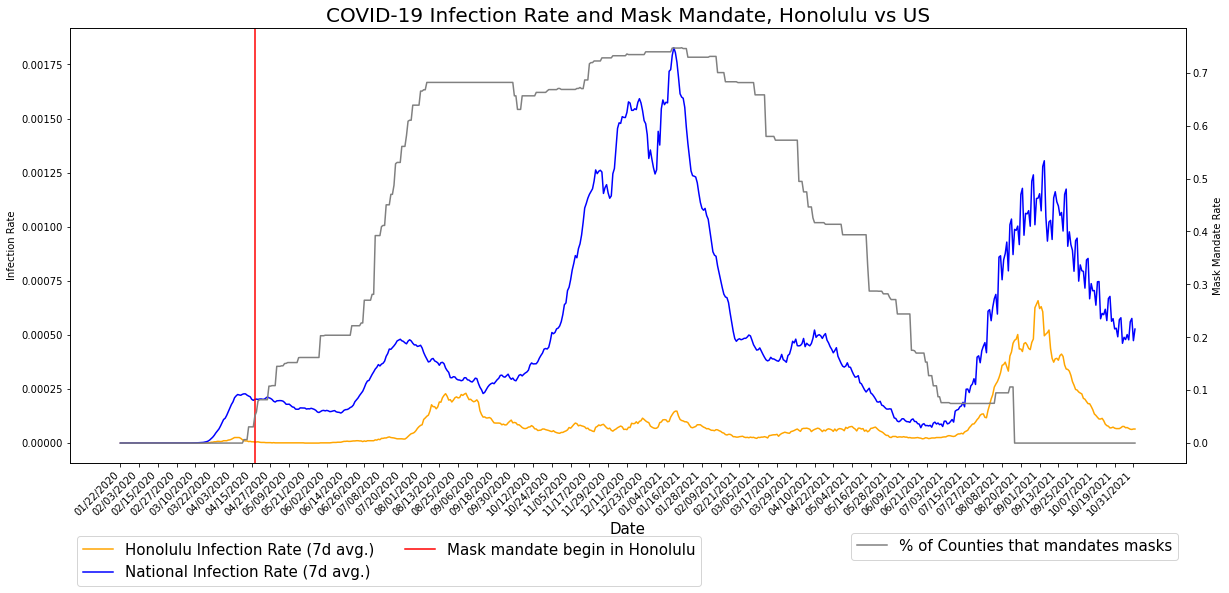

In [19]:

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

x = [datetime.strptime(a[0], "%m/%d/%y") for a in cases]
daily_cases = [a[2] for a in cases]
seven_mov_avg = [a[3] for a in cases]
total_seven_mov_avg = [a[3] for a in totalcases]

infec_rate = [a[4] for a in cases]
total_infec_rate = [a[4] for a in totalcases]

fig, ax1 = plt.subplots(figsize=(20, 8))

ax2 = ax1.twinx()                                                                                             
                                                                                                     
# plt.plot(x,daily_cases, color = "black", label = "Daily confirmed cases")
ax1.plot(x,infec_rate, color = "orange", label = "Honolulu Infection Rate (7d avg.)")
ax1.plot(x,total_infec_rate, color = "blue", label = "National Infection Rate (7d avg.)")
ax2.plot(x,rates, color = "grey", label = "% of Counties that mandates masks")
ax1.axvline(x=datetime(2020, 4, 17), label='Mask mandate begin in Honolulu', c='r')
plt.title('COVID-19 Infection Rate and Mask Mandate, Honolulu vs US', size = 20)
ax1.set_xlabel('Date', size = 15)
ax1.set_xticks(x[::12])
ax1.set_xticklabels([d.strftime("%m/%d/%Y") for d in x[::12]], rotation=45, horizontalalignment='right')
ax1.set_ylabel('Infection Rate')
ax2.set_ylabel('Mask Mandate Rate')
ax1.legend(prop={'size': 15}, bbox_to_anchor=(0,-0.3,1,0.2), loc="lower left", ncol = 2)
ax2.legend(prop={'size': 15}, bbox_to_anchor=(0,-0.24,1,0.2), loc="lower right", ncol = 2)
plt.ticklabel_format(axis="y", style="plain")
plt.savefig(fname = 'a4_output_figures/infection_rate.png')

plt.show()


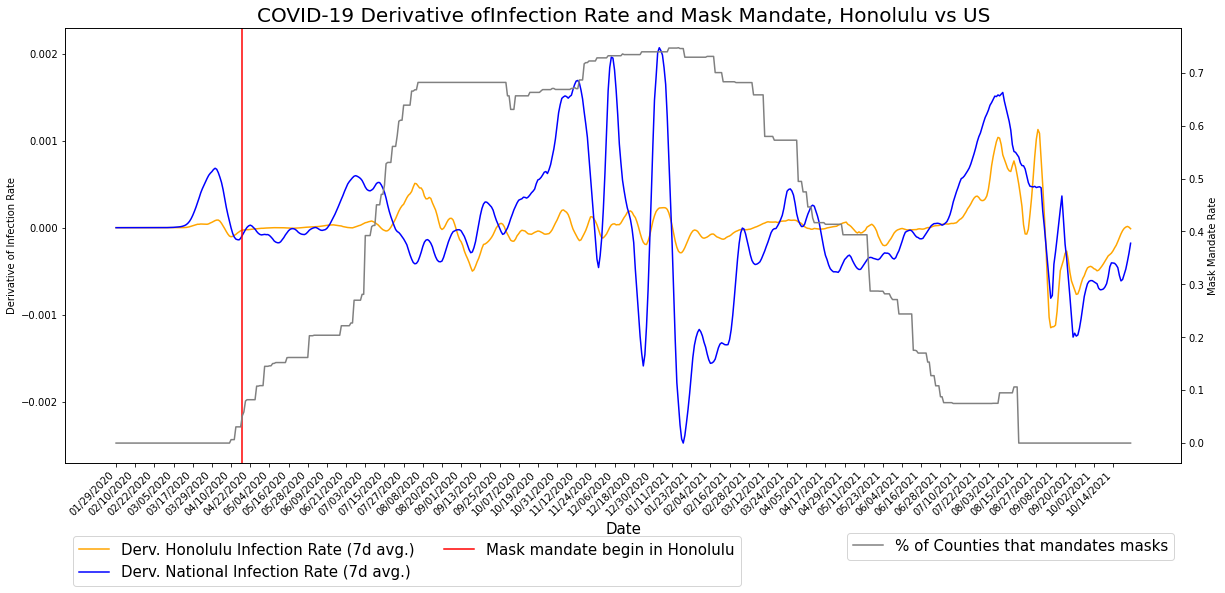

In [20]:

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

x = [datetime.strptime(a[0], "%m/%d/%y") for a in cases]
daily_cases = [a[2] for a in cases]
seven_mov_avg = [a[3] for a in cases]
total_seven_mov_avg = [a[3] for a in totalcases]

infec_rate = [a[4] for a in cases]
total_infec_rate = [a[4] for a in totalcases]

fig, ax1 = plt.subplots(figsize=(20, 8))

ax2 = ax1.twinx()       

x = x[7: -7]
infec_rate_derv = [(np.sum([cases[i + t][4] for t in range(0, 7)]) - np.sum([cases[i + t][4] for t in range(-7, 0)]))/(cases[i][4] * 4 + 1) for i in range(7, len(cases) - 7)]
total_infec_rate_derv = [(np.sum([totalcases[i + t][4] for t in range(0, 7)]) - np.sum([totalcases[i + t][4] for t in range(-7, 0)]))/(totalcases[i][4] * 4 + 1) for i in range(7, len(totalcases) - 7)]
                                                                                                     
# plt.plot(x,daily_cases, color = "black", label = "Daily confirmed cases")
ax1.plot(x,infec_rate_derv, color = "orange", label = "Derv. Honolulu Infection Rate (7d avg.)")
ax1.plot(x,total_infec_rate_derv, color = "blue", label = "Derv. National Infection Rate (7d avg.)")
ax2.plot(x,rates[7: -7], color = "grey", label = "% of Counties that mandates masks")
ax1.axvline(x=datetime(2020, 4, 17), label='Mask mandate begin in Honolulu', c='r')
plt.title('COVID-19 Derivative ofInfection Rate and Mask Mandate, Honolulu vs US', size = 20)
ax1.set_xlabel('Date', size = 15)
ax1.set_xticks(x[::12])
ax1.set_xticklabels([d.strftime("%m/%d/%Y") for d in x[::12]], rotation=45, horizontalalignment='right')
ax1.set_ylabel('Derivative of Infection Rate')
ax2.set_ylabel('Mask Mandate Rate')
ax1.legend(prop={'size': 15}, bbox_to_anchor=(0,-0.3,1,0.2), loc="lower left", ncol = 2)
ax2.legend(prop={'size': 15}, bbox_to_anchor=(0,-0.24,1,0.2), loc="lower right", ncol = 2)
plt.ticklabel_format(axis="y", style="plain")
plt.savefig(fname = 'a4_output_figures/derivative_infection_rate.png')

plt.show()
